# Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
train=pd.read_csv("revised_train.csv")
test=pd.read_csv("revised_test.csv")
variable_description=pd.read_csv('Variable_Description.csv')

In [2]:
#Peek at the data
train.head(5)

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [3]:
print("Train file contain datapoints for {} countries".format(train['Region'].value_counts().index))
print("Test file contain datapoints for {} countries".format(test['Region'].value_counts().index))

Train file contain datapoints for Index(['Chennai', 'Bengaluru', 'Chandigarh', 'Bhubaneshwar', 'Delhi'], dtype='object') countries
Test file contain datapoints for Index(['Pune', 'Thiruvananthapuram', 'Kolkata', 'Mumbai', 'Hyderabad',
       'Delhi'],
      dtype='object') countries


Since training data and test data is not for same cities it is good to ignore this feature

In [4]:
#Discarding useless columns
print("Here are all columns with Description")
variable_description.style.set_properties(subset=['Description'],**{'width':'700px'})
#variable_description

Here are all columns with Description


,Variables,Description
0,people_ID,Unique ID for each person
1,Region,The area that the person belongs to
2,Gender,Gender of the person
3,Designation,Designation of the person
4,First_Name,Name of the person
5,Married,Married or not
6,Children,Number of children
7,Occupation,sector of his occupation
8,Mode_transport,Mode of transport that he mostly chooses to travel
9,cases/1M,Number of confirmed cases per 1 million population in that region


In [5]:
#Train datasize-
train.shape

(10714, 28)

In [6]:
#Based on intuition sense i think following columns can be best canditate for predictor variables:
column_to_be_included=['Gender','Married','Children','Occupation','Mode_transport','cases/1M','Deaths/1M','comorbidity','Age','Coma score','Pulmonary score','cardiological pressure','Platelets','HBB','d-dimer','Heart rate','HDL cholesterol','Charlson Index','Blood Glucose','FT/month']

In [7]:
#Creating dataset based on essential variables
X_train=train[column_to_be_included]
X_test=test[column_to_be_included]
test_id=test['people_ID']
Y_train=train['Infect_Prob']

In [8]:
X_train.shape,X_test.shape

((10714, 20), (14498, 20))

In [9]:
#Peek at the training data
X_train.head()

,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month
0,Female,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,154.0,93.0,233.0,82.0,58.0,27,7,2.0
1,Female,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,121.0,56.0,328.0,89.0,68.0,5,6,1.0
2,Female,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,124.0,137.0,213.0,77.0,43.0,40,6,1.0
3,Female,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,98.0,167.0,275.0,64.0,60.0,27,7,1.0
4,Female,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,21.0,153.0,331.0,71.0,64.0,32,7,1.0


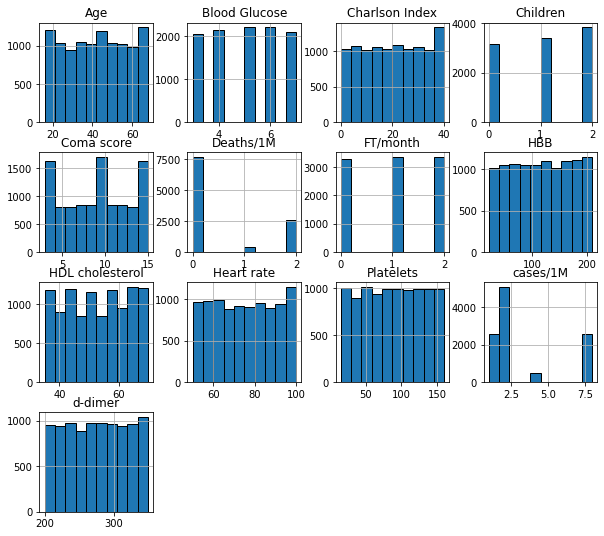

In [10]:
#Checking histogram for all other cities
X_train.hist(figsize=(10,9),ec='k')
plt.show()

Text(0.5, 1.0, 'cardiological pressure')

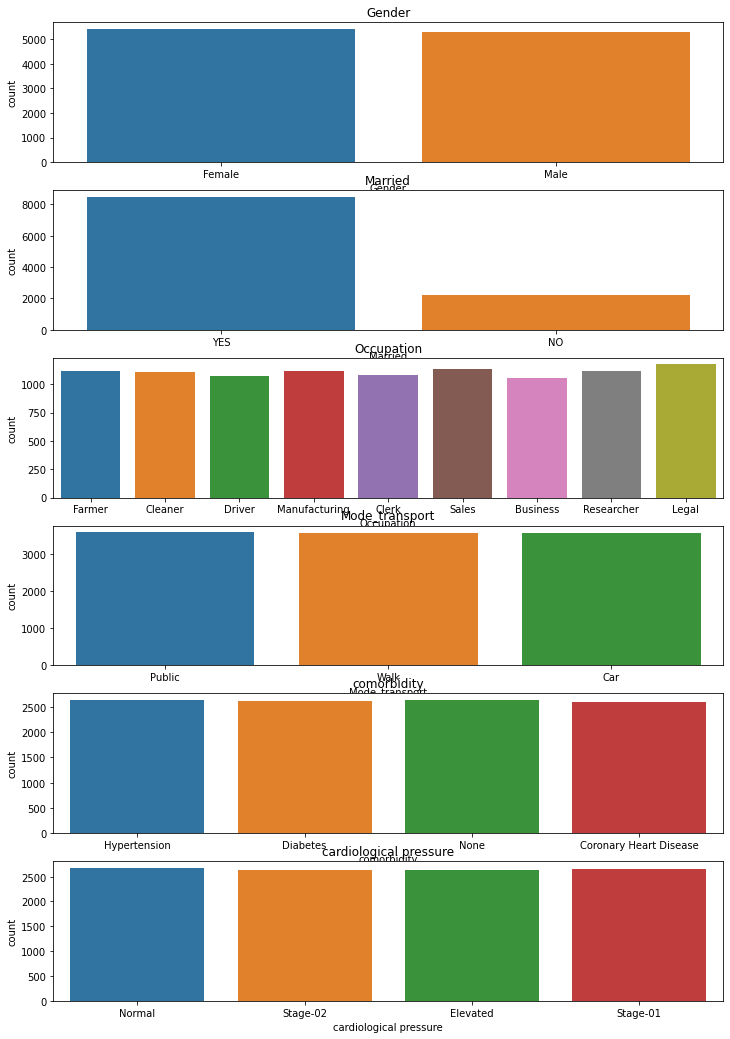

In [11]:
#Exploring categorical columns
import seaborn as sns
f,ax=plt.subplots(6,figsize=(12,18))
#sns.countplot('Region',data=X_train,ax=ax[0])
sns.countplot('Gender',data=X_train,ax=ax[0])
sns.countplot('Married',data=X_train,ax=ax[1])
sns.countplot('Occupation',data=X_train,ax=ax[2])
sns.countplot('Mode_transport',data=X_train,ax=ax[3])
sns.countplot('comorbidity',data=X_train,ax=ax[4])
#sns.countplot('Married',data=X_train,ax=ax[6])
sns.countplot('cardiological pressure',data=X_train,ax=ax[5])
#ax[0].set_title('Region')
ax[0].set_title('Gender')
ax[1].set_title('Married')
ax[2].set_title('Occupation')
ax[3].set_title('Mode_transport')
ax[4].set_title('comorbidity')
ax[5].set_title('cardiological pressure')

## Scatter plots

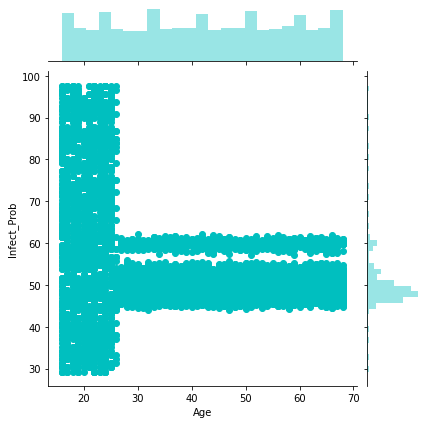

In [12]:
sns.jointplot(x='Age',y='Infect_Prob',data=train,color='c')
plt.show()

## Conclusion
1. Primarily most of the data suggests that people is age group of 15-25 have higher probablity of getting infected.
2. Although 15-25 age group has high probablity but more data is available for probablity values of 40-60 % which includes all people with ages ranging from 15-75.

In [13]:
#Features having positive correlation with target variable
print('Total number of features having positive correlation with infection probablity')
train_corr=train.corr()['Infect_Prob']
train_corr_ind=train_corr[train_corr>0.0].sort_values(ascending=False).index.tolist()
print("Count: {}".format(len(train_corr)))
print("Values:")
train_corr[train_corr_ind]

Total number of features having positive correlation with infection probablity
Count: 18
Values:


Infect_Prob        1.000000
Children           0.226795
Deaths/1M          0.174994
cases/1M           0.172871
people_ID          0.079361
Platelets          0.066727
Coma score         0.038400
d-dimer            0.021304
HBB                0.019361
HDL cholesterol    0.013288
Insurance          0.009996
Diuresis           0.006395
Name: Infect_Prob, dtype: float64

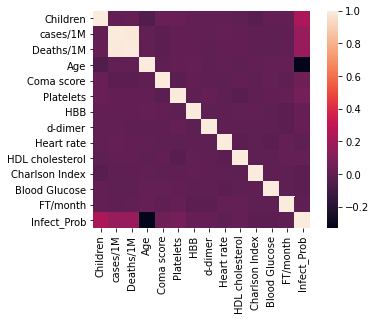

In [14]:
revised_train=pd.concat([X_train,Y_train],axis=1)
#Checking for positive correlation
sns.heatmap(revised_train.corr(),vmax=1.0,square=True)

## Conlusion:
    1. Children, cases/1M and Deaths/1M are reasonably correlated with infection probablity (target variable).
    2. As expected cases/1M and deaths/1M are almost completely correlated.

# Feature Engineering

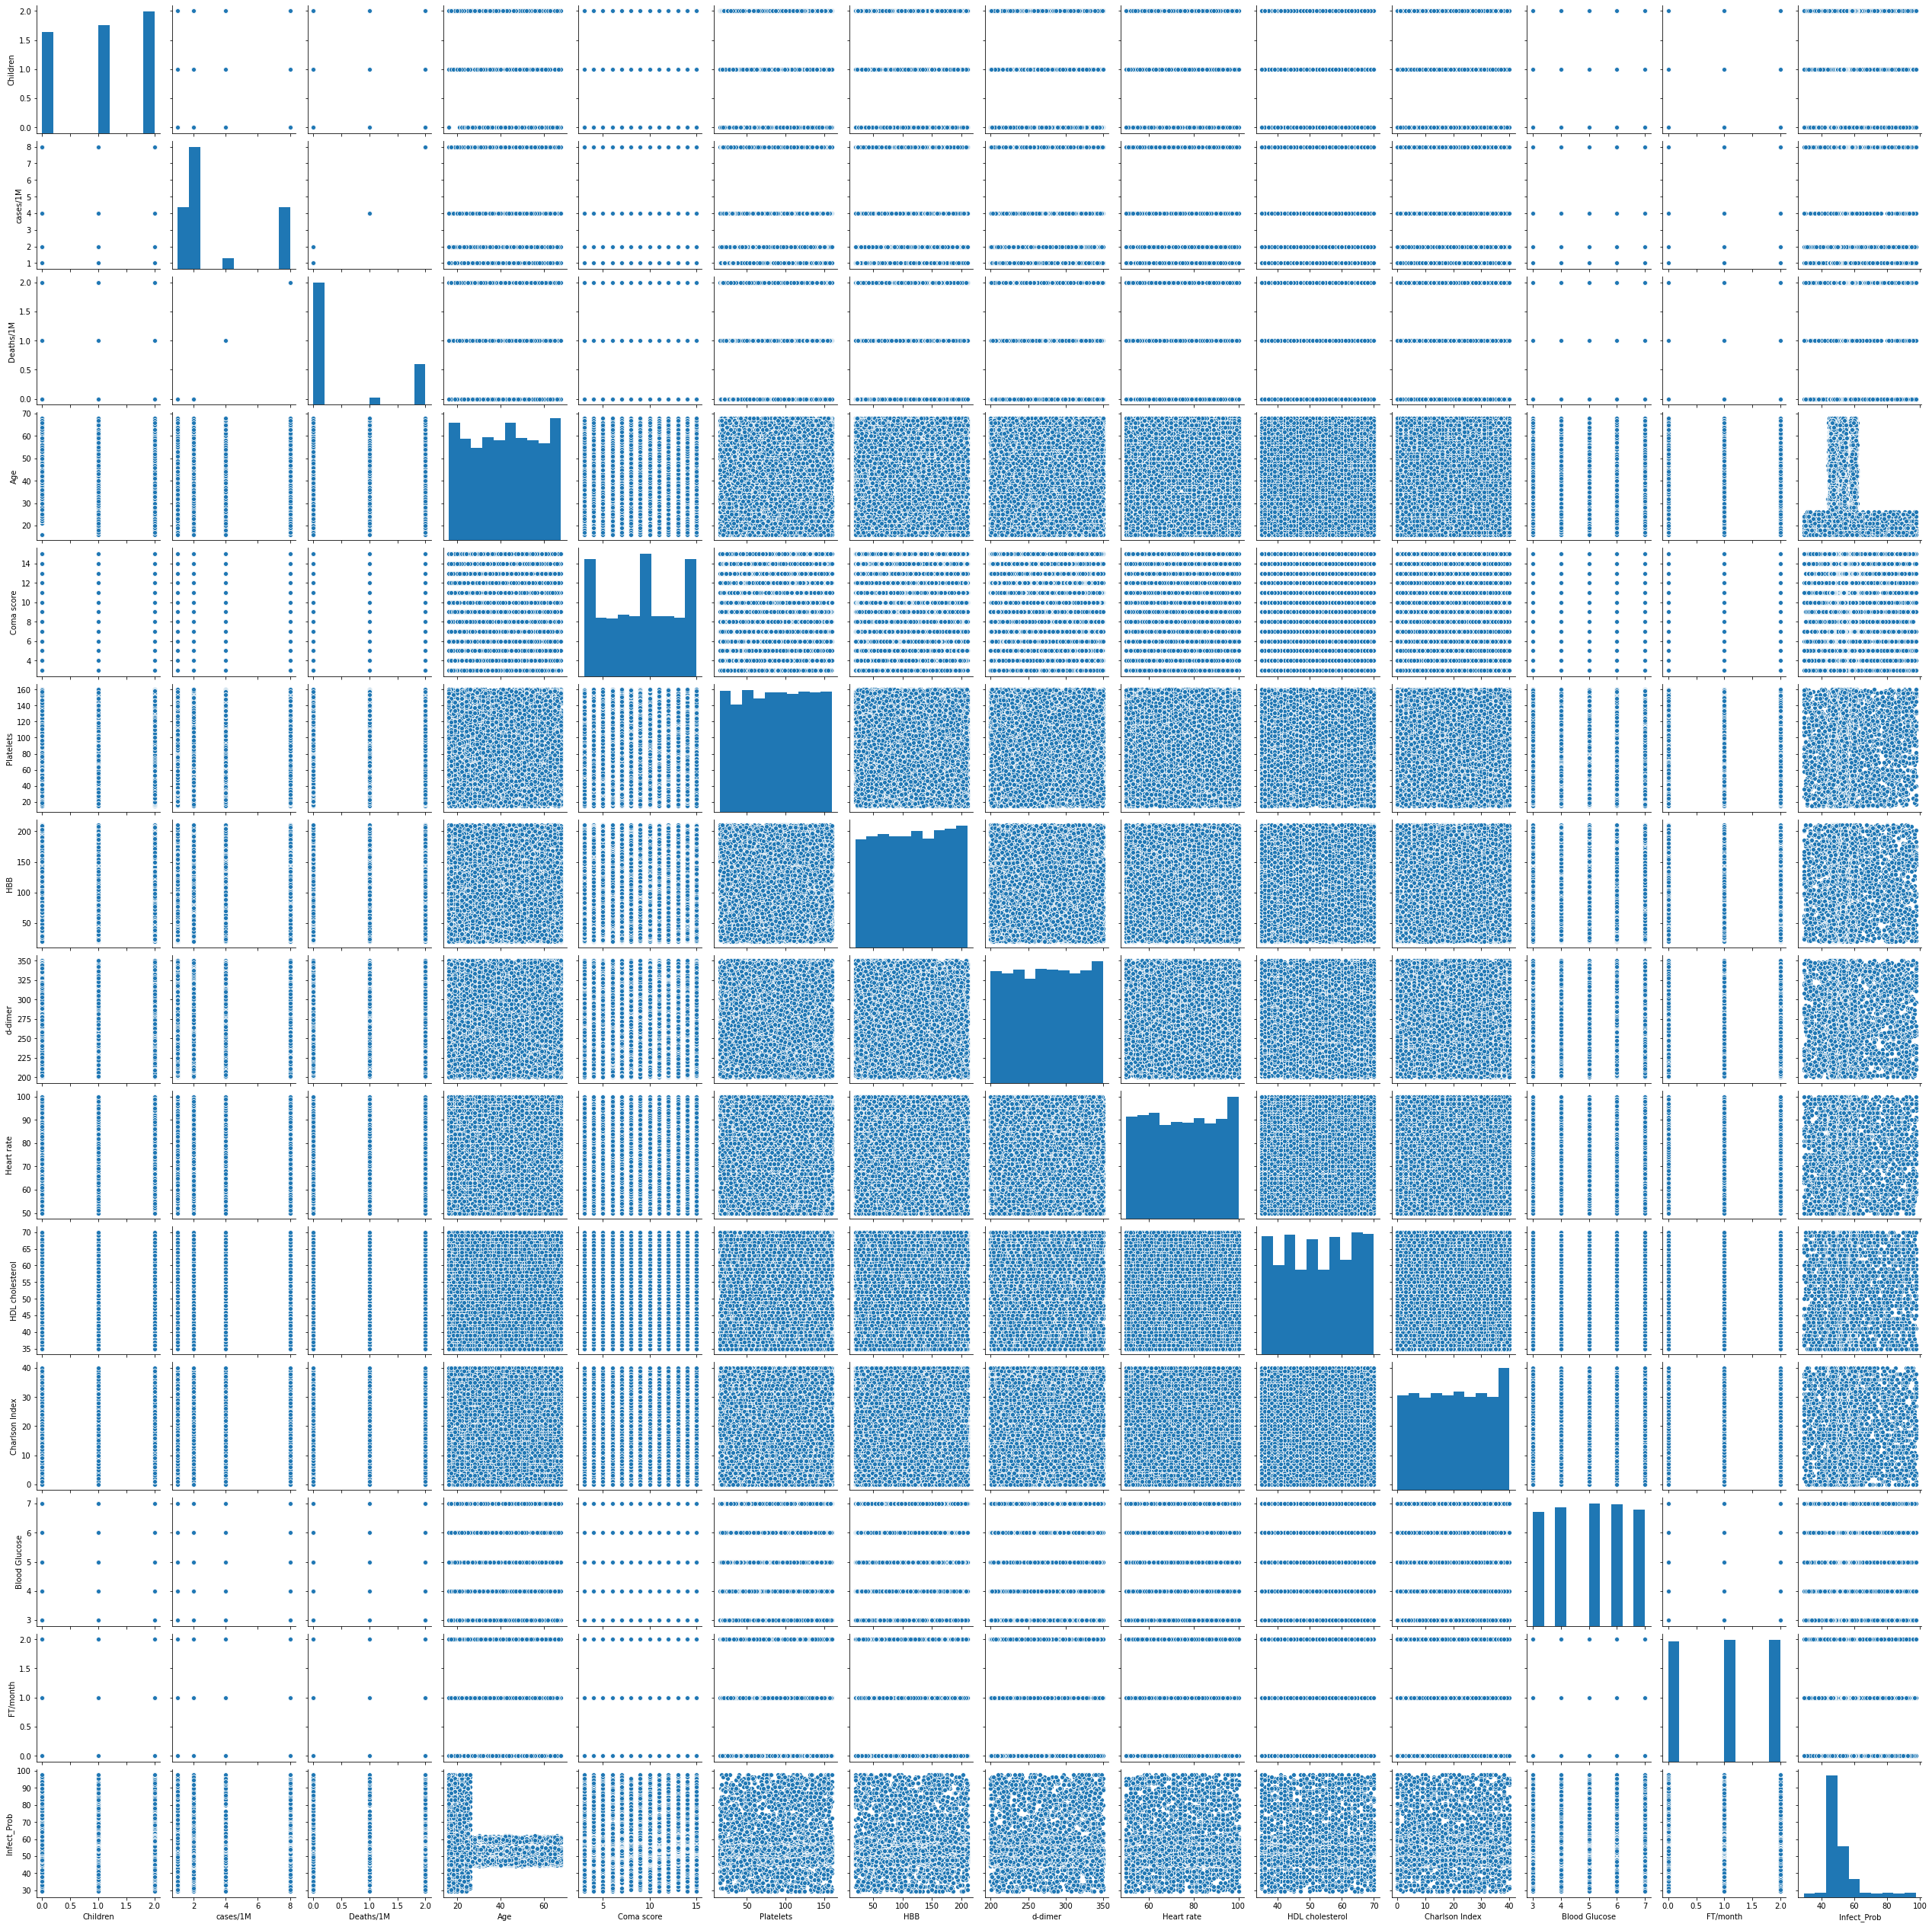

In [15]:
#Scatter plot for the whole data
sns.pairplot(revised_train)
plt.show()

# Feature engineering and imputing missing values

Text(0.5, 1.0, 'Missing values')

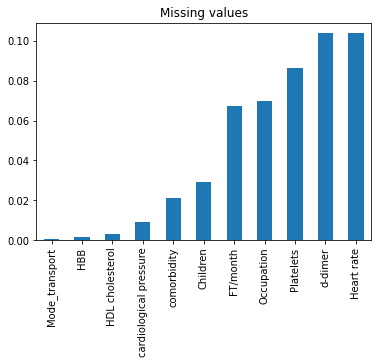

In [16]:
missing_values=revised_train.isnull().sum()
missing_values=missing_values[missing_values>0]/train.shape[0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()
plt.title("Missing values")

## Conclusion:
Since atmost 10% data is missing in features like Heart rate, it is better to impute values instead of dropping the whole feature

In [17]:
#Imputing values in categorical columns
cat_cols=['Occupation','comorbidity','cardiological pressure','Mode_transport']
for col in cat_cols:
    count=X_train[col].value_counts()
    count=count/count.sum()
    print('Relative count {}'.format(col))
    print(count)
    print('Deviation in relative counts of each occupation: {}'.format(count.std()))
    #Above results suggests that all occupations are uniformly distributed and hence we should create a new category of null occupation
X_train=pd.get_dummies(X_train,columns=cat_cols,dummy_na=True)
X_test=pd.get_dummies(X_test,columns=cat_cols,dummy_na=True)

Relative count Occupation
Legal            0.117789
Sales            0.113474
Manufacturing    0.112371
Researcher       0.111869
Farmer           0.111669
Cleaner          0.111468
Clerk            0.108157
Driver           0.107555
Business         0.105649
Name: Occupation, dtype: float64
Deviation in relative counts of each occupation: 0.0036053329715068335
Relative count comorbidity
Hypertension              0.251907
None                      0.251430
Diabetes                  0.249237
Coronary Heart Disease    0.247426
Name: comorbidity, dtype: float64
Deviation in relative counts of each occupation: 0.002072930823686797
Relative count cardiological pressure
Normal      0.252520
Stage-01    0.250259
Elevated    0.248752
Stage-02    0.248469
Name: cardiological pressure, dtype: float64
Deviation in relative counts of each occupation: 0.001854303121411491
Relative count Mode_transport
Public    0.334983
Walk      0.333115
Car       0.331902
Name: Mode_transport, dtype: float64
Devi

In [18]:
#Onehot encoding of remaining categorical features
one_hot_cols=['Gender','Married','Pulmonary score']
X_train=pd.get_dummies(X_train,columns=one_hot_cols,dummy_na=False)
X_test=pd.get_dummies(X_test,columns=one_hot_cols,dummy_na=False)

In [19]:
from sklearn.preprocessing import KBinsDiscretizer

X = [[-2, 1, -4,   -1],
     [-1, 2, -3, -0.5],
     [ 0, 3, -2,  0.5],
     [ 1, 4, -1,    2]]
est = KBinsDiscretizer(n_bins=2, encode='onehot', strategy='quantile')
est.fit(X)

Xt = est.transform(X)
Xt.toarray()

array([[1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1.]])

In [20]:
print(X_train.T.index,len(X_train.T.index))
print(X_test.T.index,len(X_test.T.index))

Index(['Children', 'cases/1M', 'Deaths/1M', 'Age', 'Coma score', 'Platelets',
       'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol', 'Charlson Index',
       'Blood Glucose', 'FT/month', 'Occupation_Business',
       'Occupation_Cleaner', 'Occupation_Clerk', 'Occupation_Driver',
       'Occupation_Farmer', 'Occupation_Legal', 'Occupation_Manufacturing',
       'Occupation_Researcher', 'Occupation_Sales', 'Occupation_nan',
       'comorbidity_Coronary Heart Disease', 'comorbidity_Diabetes',
       'comorbidity_Hypertension', 'comorbidity_None', 'comorbidity_nan',
       'cardiological pressure_Elevated', 'cardiological pressure_Normal',
       'cardiological pressure_Stage-01', 'cardiological pressure_Stage-02',
       'cardiological pressure_nan', 'Mode_transport_Car',
       'Mode_transport_Public', 'Mode_transport_Walk', 'Mode_transport_nan',
       'Gender_Female', 'Gender_Male', 'Married_NO', 'Married_YES',
       'Pulmonary score_<100', 'Pulmonary score_<200', 'Pulmonary score_

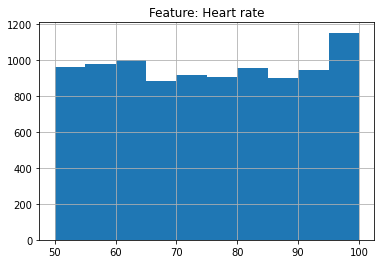

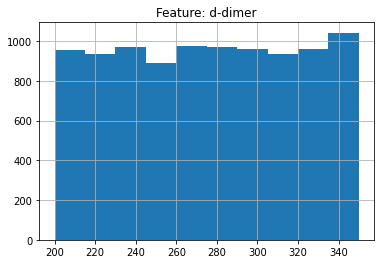

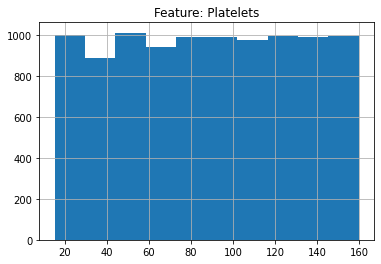

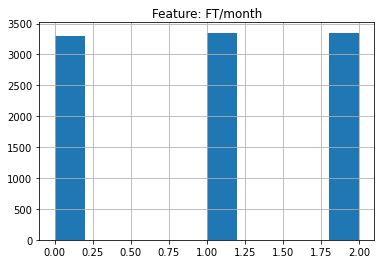

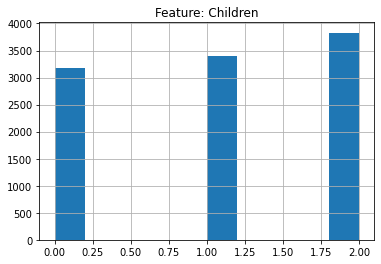

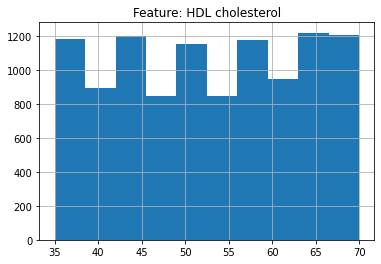

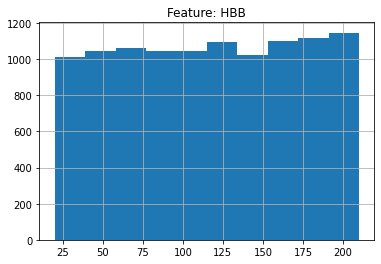

In [21]:
#Imputing and binning of numerical features
num_cols=['Heart rate','d-dimer','Platelets','FT/month','Children','HDL cholesterol','HBB']
for  col in num_cols:
    X_train[col].hist()
    plt.title('Feature: '+ col)
    plt.show()

## Conclusion
1. 'Children' feature has missing values and all other possible values are uniformly distributed and hence we cannot use median or mean for imputation as it can unnecessarily increase datapoints for a single value.
2. Similar situation is with other numerical features.

**Possible Solution**- One-hot encode in case of 'Children' column with special column for missing values. Similarly, binning for continous numerical features with a special bin for missing values.

In [22]:
#For 'Children' and 'FT/month' feature
import numpy as np

X_train['Children']=X_train['Children'].apply(lambda x: str(float(x)) if x is not np.nan else x)
X_train['FT/month']=X_train['FT/month'].apply(lambda x: str(float(x)) if x is not np.nan else x)
X_train=pd.get_dummies(X_train,columns=['Children','FT/month'])
#Applying same for test data
X_test['Children']=X_test['Children'].apply(lambda x: str(float(x)) if x is not np.nan else x)
X_test['FT/month']=X_test['FT/month'].apply(lambda x: str(float(x)) if x is not np.nan else x)
X_test=pd.get_dummies(X_test,columns=['Children','FT/month'])
#Since there is no missing data in test dataset we will have to introduce two empty columns in dataframe.
X_test['Children_nan']=[0]*X_test.shape[0]
X_test['FT/month_nan']=[0]*X_test.shape[0]

In [23]:
X_test=X_test[list(X_train.columns)]  #Rearranging columns

In [24]:
quantile_list=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.]
labels=['1','2','3','4','5','6','7','8','9','10']
for col in ['Heart rate','d-dimer','Platelets','HDL cholesterol','HBB']:
    quantiles=X_train[col].quantile(quantile_list)
    bin_ranges=list(X_train[col].quantile(quantile_list).values)
    X_train[col]=pd.cut(np.array(X_train[col]),bins=bin_ranges,labels=labels)
    X_test[col]=pd.cut(X_test[col],bins=bin_ranges,labels=labels)
X_train=pd.get_dummies(X_train,columns=['Heart rate','d-dimer','Platelets','HDL cholesterol','HBB'],dummy_na=True)
X_test=pd.get_dummies(X_test,columns=['Heart rate','d-dimer','Platelets','HDL cholesterol','HBB'],dummy_na=True)    

In [25]:
X_test=X_test[list(X_train.columns)]  #Rearranging columns

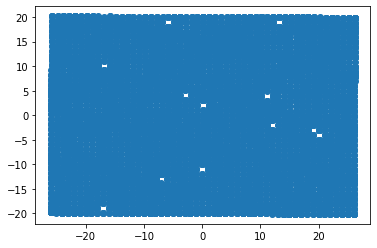

In [26]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
tmp=pca.fit_transform(X_train)
plt.scatter(tmp[:,0],tmp[:,1])

## Conclusion
Above plot suggests that there are no appreciable outliers in the data.

In [27]:
#Peek at transformed data
X_train.head(5)

,cases/1M,Deaths/1M,Age,Coma score,Charlson Index,Blood Glucose,Occupation_Business,Occupation_Cleaner,Occupation_Clerk,Occupation_Driver,...,HBB_2,HBB_3,HBB_4,HBB_5,HBB_6,HBB_7,HBB_8,HBB_9,HBB_10,HBB_nan
0,2,0,68,8,27,7,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,0,64,15,5,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,0,19,13,40,6,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,0,33,9,27,7,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2,0,23,7,32,7,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
#Columns with positive correlation with infection_probablity
pos_corls_cols=['cases/1M','Deaths/1M']
for col in pos_corls_cols:
    count=X_train[col].value_counts()
    count=count/count.sum()
    print('Relative count {}'.format(col))
    print(count)
    print('Deviation in relative counts of each occupation: {}'.format(count.std()))    

Relative count cases/1M
2    0.476013
1    0.240900
8    0.240153
4    0.042934
Name: cases/1M, dtype: float64
Deviation in relative counts of each occupation: 0.17714179295096671
Relative count Deaths/1M
0    0.716912
2    0.240153
1    0.042934
Name: Deaths/1M, dtype: float64
Deviation in relative counts of each occupation: 0.34651623041094065


## Conclusion:
    1. For 'Cases/1M' feature, most of the case (~48%) are having 2 values. So for this feature i guess engineering would be encoding it as either 2 or not 2 (ie, extremum).
    2. About 70% datapoints have Deaths/1M as 0 hence this column can be further broke into death and no death column.

In [29]:
X_train['cases/1M-not_extreme']=X_train['cases/1M'].apply(lambda x: 1 if x==2 else 0)
X_train['cases/1M-extreme']=X_train['cases/1M'].apply(lambda x: 1 if x!=2 else 0)
del X_train['cases/1M']
X_train['No-Deaths/1M']=X_train['Deaths/1M'].apply(lambda x: 1 if x==1 else 0)
X_train['Some-Deaths/1M']=X_train['Deaths/1M'].apply(lambda x: 1 if x!=1 else 0)
del X_train['Deaths/1M']

X_test['cases/1M-not_extreme']=X_test['cases/1M'].apply(lambda x: 1 if x==2 else 0)
X_test['cases/1M-extreme']=X_test['cases/1M'].apply(lambda x: 1 if x!=2 else 0)
del X_test['cases/1M']
X_test['No-Deaths/1M']=X_test['Deaths/1M'].apply(lambda x: 1 if x==1 else 0)
X_test['Some-Deaths/1M']=X_test['Deaths/1M'].apply(lambda x: 1 if x!=1 else 0)
del X_test['Deaths/1M']

### Remaining features:
Age, Coma score, Charson index, Blood glucose are features that do not have any missing data and no appreciable linear correlation. Lets look at the type of values they contain:


In [30]:
X_train[['Age','Coma score','Charlson Index','Blood Glucose']].describe()

,Age,Coma score,Charlson Index,Blood Glucose
count,10714.000000,10714.000000,10714.000000,10714.000000
mean,42.083722,9.013067,20.028094,5.015027
std,15.323397,3.714970,11.828445,1.399770
min,16.000000,3.000000,0.000000,3.000000
25%,29.000000,6.000000,10.000000,4.000000
50%,42.000000,9.000000,20.000000,5.000000
75%,55.000000,12.000000,30.000000,6.000000
max,68.000000,15.000000,40.000000,7.000000


In [31]:
#One peek
X_train[['Age','Coma score','Charlson Index','Blood Glucose']].dtypes

Age               int64
Coma score        int64
Charlson Index    int64
Blood Glucose     int64
dtype: object

#### Conclusion: 
Based on the histograms it feels okay to bin adaptively 'Age', 'Coma Score', 'Charlson Index' in 4 bins.
Further 'Blood Glucose' appears to be a score between 1-7 hence it can be one hot encoded.

In [32]:
#One hot encoding 
X_train['Blood Glucose']=X_train['Blood Glucose'].apply(lambda x: str(x))
X_train=pd.get_dummies(X_train,columns=['Blood Glucose'])

In [33]:
#One hot encoding 
X_test['Blood Glucose']=X_test['Blood Glucose'].apply(lambda x: str(x))
X_test=pd.get_dummies(X_test,columns=['Blood Glucose'])

In [34]:
#Adaptive binning with 4 bins
quantile_list=[0,.25,.5,.75,1.]
quantile_name=['1','2','3','4']
for col in ['Age','Coma score','Charlson Index']:
    X_train[col]= pd.qcut(X_train[col],q=quantile_list,labels=quantile_name)
    X_test[col]= pd.qcut(X_test[col],q=quantile_list,labels=quantile_name)
X_train=pd.get_dummies(X_train,columns=['Age','Coma score','Charlson Index'])
X_test=pd.get_dummies(X_test,columns=['Age','Coma score','Charlson Index'])


In [35]:
print(X_train.T.index,len(X_train.T.index))
print(X_test.T.index,len(X_test.T.index))

Index(['Occupation_Business', 'Occupation_Cleaner', 'Occupation_Clerk',
       'Occupation_Driver', 'Occupation_Farmer', 'Occupation_Legal',
       'Occupation_Manufacturing', 'Occupation_Researcher', 'Occupation_Sales',
       'Occupation_nan',
       ...
       'Age_3', 'Age_4', 'Coma score_1', 'Coma score_2', 'Coma score_3',
       'Coma score_4', 'Charlson Index_1', 'Charlson Index_2',
       'Charlson Index_3', 'Charlson Index_4'],
      dtype='object', length=116) 116
Index(['Occupation_Business', 'Occupation_Cleaner', 'Occupation_Clerk',
       'Occupation_Driver', 'Occupation_Farmer', 'Occupation_Legal',
       'Occupation_Manufacturing', 'Occupation_Researcher', 'Occupation_Sales',
       'Occupation_nan',
       ...
       'Age_3', 'Age_4', 'Coma score_1', 'Coma score_2', 'Coma score_3',
       'Coma score_4', 'Charlson Index_1', 'Charlson Index_2',
       'Charlson Index_3', 'Charlson Index_4'],
      dtype='object', length=116) 116


In [36]:
X_test=X_test[list(X_train.columns)]

In [37]:
#Randomizing training data
X_train_tot=pd.concat([X_train,Y_train],axis=1)
X_train_tot=X_train_tot.sample(frac=1).reset_index(drop=True)
X_train=X_train_tot[list(X_train.columns)]
Y_train=X_train_tot['Infect_Prob']

## Saving data into csv files for modeling

In [38]:
X_train.to_csv('train_features.csv',index=False)
X_test.to_csv('test_features.csv',index=False)
test_id.to_csv('test_id.csv',index=False)
Y_train.to_csv('infection_probablity.csv',index=False)